<a href="https://colab.research.google.com/github/rajapriyanshu2002/tooth-cavity/blob/main/ToothCavityCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"rajapriyanshu","key":"23ed1e3bf12eff842cb341a2420cf698"}'}

In [3]:
#downloading direct through kaggle dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
#getting dataset from kaggle
!kaggle datasets download -d rajapriyanshu/toothcavity

  0% 0.00/779k [00:00<?, ?B/s]
100% 779k/779k [00:00<00:00, 154MB/s]


In [6]:
#Extracting zipfile
import zipfile
zip_ref = zipfile.ZipFile('/content/toothcavity.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tfk
from tensorflow import keras
from keras import Sequential
import os
import json
from keras.layers import Dense,Conv2D,MaxPooling2D, Flatten, BatchNormalization, Dropout, Activation
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from keras import backend as K

In [8]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

In [9]:
image_shape=(150, 150, 3)

In [10]:
model = Sequential()

In [11]:
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(150, 150, 3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(150, 150, 3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(150, 150, 3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
model.add(Flatten())

In [13]:
model.add(Dense(128))
model.add(Activation('relu'))

In [14]:
#fixing oversizing
model.add(Dropout(0.5))

In [15]:
model.add(Dense(1))
model.add(Activation('sigmoid'))
# This function takes any real value as input and outputs values in the range of 0 to 1. The larger the input (more positive),
# the closer the output value will be to 1.0, whereas the smaller the input (more negative), the closer the output will be to 0.0, as shown below.

In [16]:
model.compile(loss='binary_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])
model.save_weights('model1.h5')

In [17]:
#summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [18]:
batch_size=5

In [19]:
train_image_gen=image_gen.flow_from_directory('/content/teeth_dataset/Trianing',
                                             target_size=image_shape[:2],
                                             batch_size=batch_size,
                                             class_mode='binary')

Found 60 images belonging to 2 classes.


In [20]:
test_image_gen=image_gen.flow_from_directory('/content/teeth_dataset/test',
                                             target_size=image_shape[:2],
                                             batch_size=batch_size,
                                             class_mode='binary')


Found 14 images belonging to 2 classes.


In [21]:
train_image_gen.class_indices

{'caries': 0, 'without_caries': 1}

In [22]:
import warnings
warnings.filterwarnings('ignore')

Training the model with 75 epochs and 10 steps per epoch

In [23]:
results = model.fit_generator(train_image_gen,
                              epochs= 75,
                             steps_per_epoch=10,
                             validation_data=test_image_gen,
                             validation_steps=12)

Epoch 1/75
 9/10 [==========================>...] - ETA: 0s - loss: 0.7068 - accuracy: 0.6222

10/10 [==============================] - 8s 83ms/step - loss: 0.6667 - accuracy: 0.6600 - val_loss: 0.6597 - val_accuracy: 0.7143
Epoch 2/75
10/10 [==============================] - 0s 33ms/step - loss: 0.6051 - accuracy: 0.7600
Epoch 3/75
10/10 [==============================] - 0s 33ms/step - loss: 0.6116 - accuracy: 0.7000
Epoch 4/75
10/10 [==============================] - 0s 33ms/step - loss: 0.5869 - accuracy: 0.7800
Epoch 5/75
10/10 [==============================] - 0s 34ms/step - loss: 0.4811 - accuracy: 0.7400
Epoch 6/75
10/10 [==============================] - 0s 33ms/step - loss: 0.6146 - accuracy: 0.8000
Epoch 7/75
10/10 [==============================] - 0s 32ms/step - loss: 0.3703 - accuracy: 0.8000
Epoch 8/75
10/10 [==============================] - 0s 33ms/step - loss: 0.2798 - accuracy: 0.8600
Epoch 9/75
10/10 [==============================] - 0s 33ms/step - loss: 0.4299 - accuracy: 0.8200
Epoch 10/75
10/10 [==============================] - 1s 67ms/step - loss: 0.37

In [24]:
model.save("/content/gdrive/MyDrive/CNN_Model")

In [25]:
!pwd

/content


In [26]:
%matplotlib inline

In [27]:
# from keras.preprocessing import image
import keras.utils as image
import numpy as np
def get_res(path):
    raw_img = image.load_img(path, target_size=(150, 150))
    raw_img = image.img_to_array(raw_img)
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img / 255
    predict = model.predict(raw_img)
    print(type(raw_img))
    print(raw_img.shape)
    plt.imshow(cv2.imread(path))
    if predict >= 0.5:
        text = "Healthy tooth"
    elif 0.25 <= predict <= 0.45:
        text = "Mild Cavity"
    else:
        text = "Cavity infected tooth \nRecommended to consult dentist"
    plt.show()
    print(text)

1/1 [==============================] - 1s 615ms/step
<class 'numpy.ndarray'>
(1, 150, 150, 3)


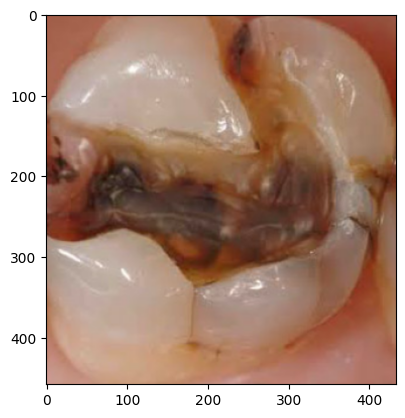

Cavity infected tooth 
Recommended to consult dentist


In [29]:
path='/content/3.PNG'
get_res(path)

1/1 [==============================] - 0s 18ms/step
<class 'numpy.ndarray'>
(1, 150, 150, 3)


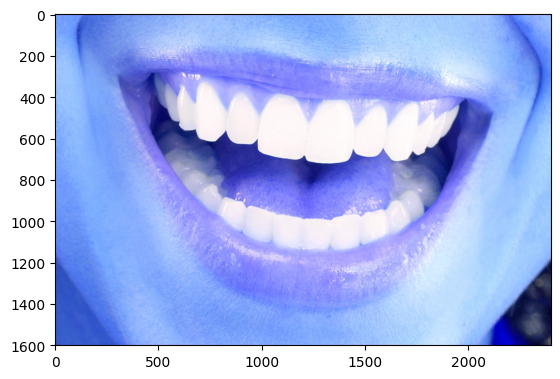

Cavity infected tooth 
Recommended to consult dentist


In [30]:
path='/content/1.jpg'
get_res(path)

1/1 [==============================] - 0s 114ms/step
<class 'numpy.ndarray'>
(1, 150, 150, 3)


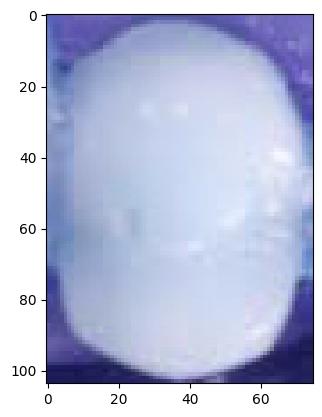

Healthy tooth


In [31]:
path='/content/teeth_dataset/test/no-caries/nc2.jpg'
get_res(path)